In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("clean_data/amazon_fashion.csv")
df

,rating,title,text,helpful_vote,verified_purchase,asin,user_id
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,3,True,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ
1,5.0,A,Great,0,True,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
2,2.0,Two Stars,One of the stones fell out within the first 2 ...,3,True,B007ZSEQ4Q,AHITBJSS7KYUBVZPX7M2WJCOIVKQ
3,1.0,Won’t buy again,Crappy socks. Money wasted. Bought to wear wit...,2,True,B07F2BTFS9,AFVNEEPDEIH5SPUN5BWC6NKL3WNQ
4,5.0,I LOVE these glasses,I LOVE these glasses! They fit perfectly over ...,0,True,B00PKRFU4O,AHSPLDNW5OOUK2PLH7GXLACFBZNQ
...,...,...,...,...,...,...,...
2500934,5.0,... allowed them to be used to add military ri...,The tie tacks were the size that allowed them ...,0,True,B00YGFMQC0,AFXSFD3FTZ2CLN3TYV4B63CQM5BQ
2500935,1.0,Didn’t come with all ten,Says ten tie clips but o only received 7.,0,True,B00YGFMQC0,AEH7WP5HGM6FGLSSC6GSTYUXBHGQ
2500936,3.0,Not checked for quality,When I received them 2-3 of them did not open ...,0,True,B00YGFMQC0,AEL2TSSBVLIPWQ7YVMK364DUYURQ
2500937,5.0,Awesome,Great product.,1,True,B00YGFMQC0,AGZ6IIYSPCW4YXWH6VFEOI7MTBZA


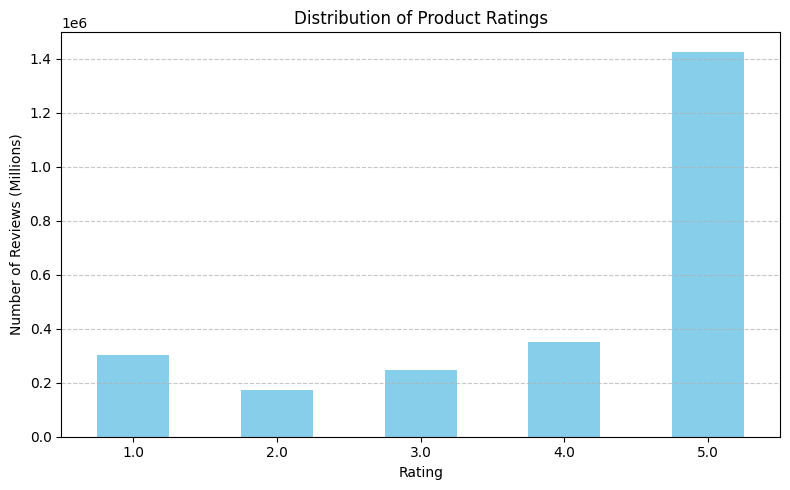

In [9]:
import matplotlib.pyplot as plt

# Calculate the frequency of each rating
rating_counts = df['rating'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews (Millions)')
plt.xticks(rotation=0) # Ensure rating labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

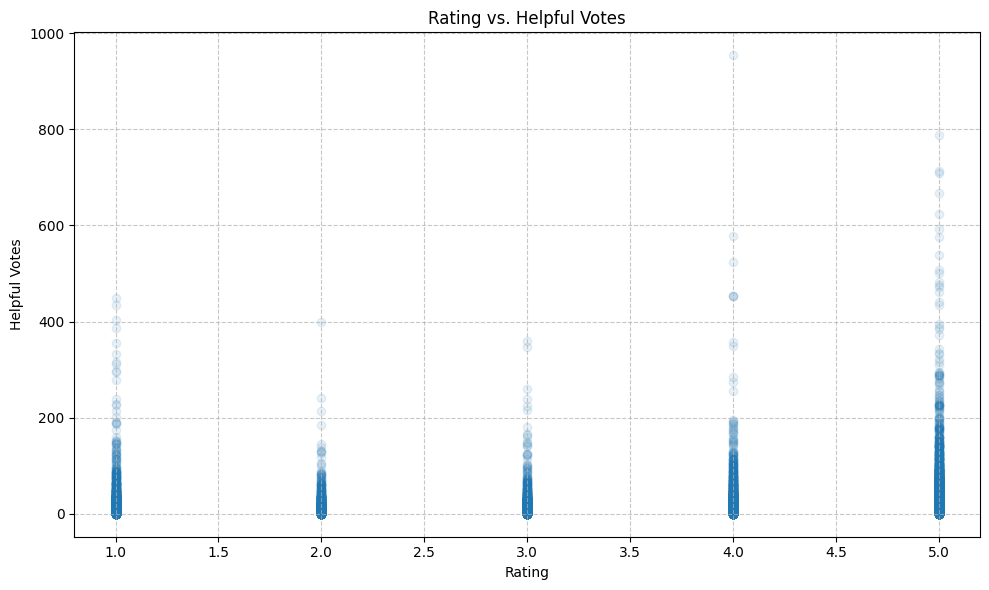

In [10]:
# Check if 'helpful_votes' column exists. If not, create a dummy one for demonstration.
# In a real scenario, you would ensure your DataFrame contains the actual 'helpful_votes' column.
# Plotting Rating (x) and Helpful Votes (y)
plt.figure(figsize=(10, 6))
# Using a scatter plot to visualize the relationship between individual ratings and helpful votes.
# Given the large number of data points (2.5 million), a low alpha value helps visualize density.
plt.scatter(df['rating'], df['helpful_vote'], alpha=0.1)
plt.title('Rating vs. Helpful Votes')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
average_helpful_votes_by_rating = df.groupby('rating')['helpful_vote'].mean()
print("Average helpful votes for each rating:")
print(average_helpful_votes_by_rating)


Average helpful votes for each rating:
rating
1.0    0.613409
2.0    0.511213
3.0    0.514635
4.0    0.625516
5.0    0.556477
Name: helpful_vote, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is already loaded and available from previous cells.
# We will use the 'text' column as the text feature and 'rating' as the target.

# 1. Prepare the data
# Fill any potential NaN values in 'text' with an empty string to prevent errors during vectorization.
df['text'] = df['text'].fillna('')

X = df['text']
y = df['rating']

# 2. Split the data into training and testing sets
# Using stratify=y ensures that the proportion of target classes (ratings) is the same in both train and test sets.
# A test_size of 0.2 (20%) is common and appropriate for large datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data size: {len(X_train)} samples")
print(f"Test data size: {len(X_test)} samples")

# 3. Create a pipeline for text feature extraction and classification
# TfidfVectorizer converts text into a matrix of TF-IDF features.
#   - stop_words='english' removes common English words that don't add much meaning.
#   - max_features=10000 limits the vocabulary size for performance and to reduce noise.
# LinearSVC is a linear support vector classifier, suitable for text classification.
#   - random_state for reproducibility.
#   - dual=False is recommended when n_samples > n_features, which is the case here (2M samples vs 10K features).
text_classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('svc', LinearSVC(random_state=42, dual=False))
])

# 4. Train the model
print("\nTraining LinearSVC model... This may take a significant amount of time due to the dataset size.")
text_classifier_pipeline.fit(X_train, y_train)
print("Model training complete.")

# 5. Make predictions on the test set
y_pred = text_classifier_pipeline.predict(X_test)

# 6. Evaluate the model
print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# The classification report provides precision, recall, and f1-score for each class.
# zero_division=0 handles cases where a class has no predicted samples, preventing warnings.
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Optional: Display a few predictions vs actual ratings to get a qualitative sense
print("\n--- Sample Predictions vs Actual Ratings ---")
sample_df = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred}).sample(5, random_state=42)
print(sample_df)


Training data size: 2000751 samples
Test data size: 500188 samples

Training LinearSVC model... This may take a significant amount of time due to the dataset size.
Model training complete.

--- Model Evaluation ---
Accuracy Score: 0.6840328036658216

Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.76      0.64     60682
         2.0       0.31      0.02      0.05     34692
         3.0       0.39      0.18      0.25     49094
         4.0       0.44      0.18      0.25     70466
         5.0       0.75      0.96      0.84    285254

    accuracy                           0.68    500188
   macro avg       0.49      0.42      0.41    500188
weighted avg       0.62      0.68      0.62    500188


--- Sample Predictions vs Actual Ratings ---
         Actual Rating  Predicted Rating
296336             5.0               5.0
2214563            5.0               5.0
115030             5.0               5.0
1983323            5.0    